## < 인증평가를 진행하기 위해선 아래 2가지 세팅이 필요합니다. >


1. Google Colab 서비스를 사용하기 위한 구글 계정(여분 하나 더 있으면 좋습니다)
- Colab에서 GPU를 무료로 사용할 때, 대략 2~3시간정도 한번에 사용 가능합니다.

- 무료 계정의 명확한 사용제한이 정해져 있지 않아, 어떤 계정은 이전 사용률의 따라서 일찍 끊길 수 있어 여분의 계정이 있으면 좋습니다.


2. Google Drive 서비스를 사용하기 위한 구글 계정 (1번과 같은 계정)
- Google Drive에 데이터를 올려서 사용해야 합니다. (colab에 직접 업로드하는 것과 비교예정)

## << 문제 정의 >>

- 주어진 데이터로 건물별 시간당 전력소비량을 예측하는 문제를 풉니다.

- 주어진 데이터는 총 4개의 csv입니다. 각 csv 파일에 대한 설명은 아래 기술되어 있습니다.

- 건물별 시간당 예측값과 실제 값 사이의 **RMSE(Root Mean Squared Error)**값을 성능 지표로 사용합니다.

- 해당 문제는 머신러닝 예측 모델을 만드는 과정을 코드로 구현하는 것을 평가합니다. 따라서 처음에 아래 문제들을 먼저 읽어본 뒤 위에서부터 차례대로 구현하는 것을 추천합니다.

- 문제 풀이가 아닌 다른 추가 코드들은 얼마든지 작성하셔도 되나, 이 코드 자체가 제출 파일이므로 제출시 다른 추가 코드들은 삭제하고 제출해주세요.


**1. train.csv**

- 학습에 사용되는 파일로 2022년 6월 1일 0시부터 2022년 8월 17일 23시까지의 100개 건물에 대한 시간당 전력소비량과 관련된 정보들이 기록되어 있습니다.

- num_date_time, 건물번호, 일시, 기온(C), 강수량(mm), 풍속(m/s), 습도(%), 전력소비량(kWh)으로 열이 구성되어 있습니다.

- 각 column들의 이름에 단위가 함께 기재되어 있습니다. 건물번호의 경우 1 ~ 100까지 100가지의 서로 다른 건물 정보를 의미하며, num_date_time은 "건물번호_일시"를 의미합니다.

- **전력소비량(kWh)가 target variable**에 해당합니다.


**2. test.csv**

- 예측에 사용되는 파일로 2022년 8월 18일 0시부터 2022년 8월 24일 23시까지의 100개 건물에 대한 정보가 담겨 있습니다.

- ***전력소비량(kWh)***이 포함되어 있지 않습니다. 해당 column값을 맞춰야합니다.


- num_date_time, 건물번호, 일시, 기온(C), 강수량(mm), 풍속(m/s), 습도(%)로 구성되어 있습니다.


- 각 row마다의 데이터를 사용해서 해당 시간, 해당 건물의 전력 소비량을 예측해주세요.


**3. building_info.csv**

- 각 건물별 정보가 들어있는 파일로, 100개의 건물별 전력사용량과 관련된 정보들이 담겨 있습니다.


- 건물번호, 건물유형, 연면적(m2), 냉방면적(m2), 태양광용량(kW), ESS저장용량(kWh), PCS용량(kW)으로 구성되어 있습니다.


- 해당 데이터는 필요시, train.csv나 test.csv에 합쳐서 사용할 수 있습니다.



**4. sample_submission.csv**

- 실제 예측값을 기록하는 파일입니다. 채점에 사용되며, sample_submission의 answer column에 예측값을 기록하면 됩니다.


- num_date_time은 test.csv의 각 row와 매칭됩니다. 순서 또한 같기 때문에, 모델에 test.csv를 예측한 값을 answer column에 기록하면 됩니다.


- 실제 성능에 대한 채점 결과는 이 파일을 기준으로 수행됩니다. **(마지막에 해당 파일에 대한 생성 코드는 주어져 있습니다.)**

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

[옵션] 데이터 시각화를 위한 한글글꼴 설치 (1분 정도 소요)

- 설치 후 세션 다시 시작 및 재실행 필요

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/X11: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/X11/encodings: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/X11/encodings/large: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/X11/misc: caching, new cache contents: 89 fonts, 0 dirs
/usr/share/fonts/X11/util: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such direc

In [3]:
!pip install tslearn


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [4]:
# 데이터분석 4종 세트
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

import time
import os
import random

# 사용 모델 (원하는 모델 추가 및 변경하셔도 됩니다)
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm.sklearn import LGBMRegressor
from tslearn.clustering import TimeSeriesKMeans, silhouette_score

# 전처리기
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 성능 지표
from sklearn.metrics import mean_squared_error

# 데이터 분할 및 hyper-param tuning
from sklearn.model_selection import train_test_split, GridSearchCV

/home/claude-dev-kcj/project/hd/ai_competency_assessment/ai_competency_assessment/.venv/lib/python3.13/site-packages/tslearn/bases/bases.py:16: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [5]:
def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)

seed_everything(42) ## 무조건 42로 세팅!! 바꾸면 debugging이 힘듭니다.

### Q1. 현재 경로에 위치하고 있는 train.csv, test.csv, building_info.csv를 불러오고, 해당 파일들의 shape을 출력하는 코드를 작성하세요.

In [6]:
# Q1
# Q1. CSV 파일들을 불러오고 shape 출력
# Q1. Load CSV files and print shapes

# 데이터 경로 설정 (Set data path)
DATA_PATH = "dataset/"

# CSV 파일 로드 (Load CSV files)
train = pd.read_csv(f"{DATA_PATH}train.csv")
test = pd.read_csv(f"{DATA_PATH}test.csv")
building_info = pd.read_csv(f"{DATA_PATH}building_info.csv")

# 각 데이터프레임의 shape 출력 (Print shape of each dataframe)
print(f"train.csv shape: {train.shape}")
print(f"test.csv shape: {test.shape}")
print(f"building_info.csv shape: {building_info.shape}")

train.csv shape: (187200, 8)
test.csv shape: (16800, 7)
building_info.csv shape: (100, 7)


In [7]:
## optional - 컬럼명 영문화 (Rename columns to English)
train.columns = ['num_date_time', 'num', 'date_time', 'temperature', 'precipitation',
                 'windspeed', 'humidity', 'target']
test.columns = ['num_date_time', 'num', 'date_time', 'temperature', 'precipitation',
                 'windspeed', 'humidity']

# building_info 컬럼명도 영문화 (Also rename building_info columns)
building_info.columns = ['num', 'building_type', 'total_area', 'cooling_area', 
                         'solar_capacity', 'ess_capacity', 'pcs_capacity']

print("컬럼명 영문화 완료 (Column renaming completed)")
print(f"train columns: {train.columns.tolist()}")
print(f"test columns: {test.columns.tolist()}")
print(f"building_info columns: {building_info.columns.tolist()}")

컬럼명 영문화 완료 (Column renaming completed)
train columns: ['num_date_time', 'num', 'date_time', 'temperature', 'precipitation', 'windspeed', 'humidity', 'target']
test columns: ['num_date_time', 'num', 'date_time', 'temperature', 'precipitation', 'windspeed', 'humidity']
building_info columns: ['num', 'building_type', 'total_area', 'cooling_area', 'solar_capacity', 'ess_capacity', 'pcs_capacity']


### Q2. train, test 데이터에 결측치가 있는지 확인하고, 해당 column별로 결측치가 몇 개씩 있는지 출력하는 코드를 작성하세요.

In [8]:
# Q2
# Q2. train, test 데이터의 결측치 확인 및 column별 결측치 개수 출력
# Q2. Check missing values in train/test data and print count per column

print("=" * 50)
print("Train 데이터 결측치 (Missing values in Train data):")
print("=" * 50)
print(train.isnull().sum())

print("\n" + "=" * 50)
print("Test 데이터 결측치 (Missing values in Test data):")
print("=" * 50)
print(test.isnull().sum())

Train 데이터 결측치 (Missing values in Train data):
num_date_time         0
num                   0
date_time             0
temperature           0
precipitation    145963
windspeed            19
humidity              9
target                0
dtype: int64

Test 데이터 결측치 (Missing values in Test data):
num_date_time        0
num                  0
date_time            0
temperature          0
precipitation    14106
windspeed            0
humidity             0
dtype: int64


### Q3. building_info에 있는 '-'을 모두 0.0으로 변경하고 '-'가 있었던 column의 dtype을 모두 float로 바꾸는 코드를 작성하세요.

In [9]:
# Q3
# Q3. building_info의 '-'를 0.0으로 변경하고 해당 column의 dtype을 float로 변환
# Q3. Replace '-' with 0.0 in building_info and convert dtype to float

# '-' 값이 있는 컬럼 찾기 (Find columns with '-' values)
columns_with_dash = []
for col in building_info.columns:
    if building_info[col].dtype == "object":
        if (building_info[col] == "-").any():
            columns_with_dash.append(col)
            
print(f"'-' 값이 있는 컬럼 (Columns with '-'): {columns_with_dash}")

# '-'를 0.0으로 변경하고 float로 변환 (Replace '-' with 0.0 and convert to float)
for col in columns_with_dash:
    building_info[col] = building_info[col].replace("-", 0.0).astype(float)

# 변환 결과 확인 (Check conversion result)
print("\n변환 후 데이터 타입 (Data types after conversion):")
print(building_info.dtypes)

'-' 값이 있는 컬럼 (Columns with '-'): ['solar_capacity', 'ess_capacity', 'pcs_capacity']

변환 후 데이터 타입 (Data types after conversion):
num                 int64
building_type      object
total_area        float64
cooling_area      float64
solar_capacity    float64
ess_capacity      float64
pcs_capacity      float64
dtype: object


### Q4. building_info를 학습에 사용하기 위해서, train, test 데이터와 합치려고 합니다. 건물번호를 기준으로 두 개의 DataFrame을 merge해주세요. INNER JOIN 연산을 사용하는 코드를 작성해주세요.

In [10]:
# Q4
# Q4. building_info를 train, test 데이터와 INNER JOIN으로 병합
# Q4. Merge building_info with train/test using INNER JOIN

# train 데이터와 building_info 병합 (Merge train with building_info)
train = pd.merge(train, building_info, on="num", how="inner")

# test 데이터와 building_info 병합 (Merge test with building_info)
test = pd.merge(test, building_info, on="num", how="inner")

# 병합 결과 확인 (Check merge result)
print(f"병합 후 train shape (Train shape after merge): {train.shape}")
print(f"병합 후 test shape (Test shape after merge): {test.shape}")
print(f"\ntrain columns: {train.columns.tolist()}")
print(f"test columns: {test.columns.tolist()}")

병합 후 train shape (Train shape after merge): (187200, 14)
병합 후 test shape (Test shape after merge): (16800, 13)

train columns: ['num_date_time', 'num', 'date_time', 'temperature', 'precipitation', 'windspeed', 'humidity', 'target', 'building_type', 'total_area', 'cooling_area', 'solar_capacity', 'ess_capacity', 'pcs_capacity']
test columns: ['num_date_time', 'num', 'date_time', 'temperature', 'precipitation', 'windspeed', 'humidity', 'building_type', 'total_area', 'cooling_area', 'solar_capacity', 'ess_capacity', 'pcs_capacity']


### Q5. 전력사용량은 건물유형별로 다른 패턴을 가질 것으로 보입니다. train 데이터에 건물유형별 전력사용량의 평균값을 계산하는 코드를 작성해주세요.

In [11]:
# Q5
# Q5. 건물유형별 전력사용량 평균값 계산
# Q5. Calculate mean power consumption by building type

# 건물유형 컬럼명 확인 (Check building type column name)
building_type_col = "building_type" if "building_type" in train.columns else "건물유형"
target_col = "target" if "target" in train.columns else "전력소비량(kWh)"

# 건물유형별 전력사용량 평균 계산 (Calculate mean power by building type)
mean_power_by_type = train.groupby(building_type_col)[target_col].mean()

print("건물유형별 전력사용량 평균 (Mean power consumption by building type):")
print("=" * 60)
print(mean_power_by_type.sort_values(ascending=False))

건물유형별 전력사용량 평균 (Mean power consumption by building type):
building_type
대학교        5448.553112
데이터센터      5394.410769
병원         2903.033558
연구소        2796.301564
상용         2293.394483
백화점및아울렛    2256.816266
건물기타       1967.538615
지식산업센터     1925.575172
공공         1676.714868
호텔및리조트     1473.405397
할인마트       1408.020505
아파트        1306.512626
Name: target, dtype: float64


### Q6. 건물유형별 전력사용량을 시간에 따른 선그래프로 출력하는 코드를 작성해주세요.
(figure는 하나에 그려도 되고, 여러개의 subplot으로 그려도 됩니다. 그래프의 색상 역시 마음대로 하셔도 되지만, 하나의 figure의 그린다면 각 plot을 서로 다른 색상으로 지정해주세요)

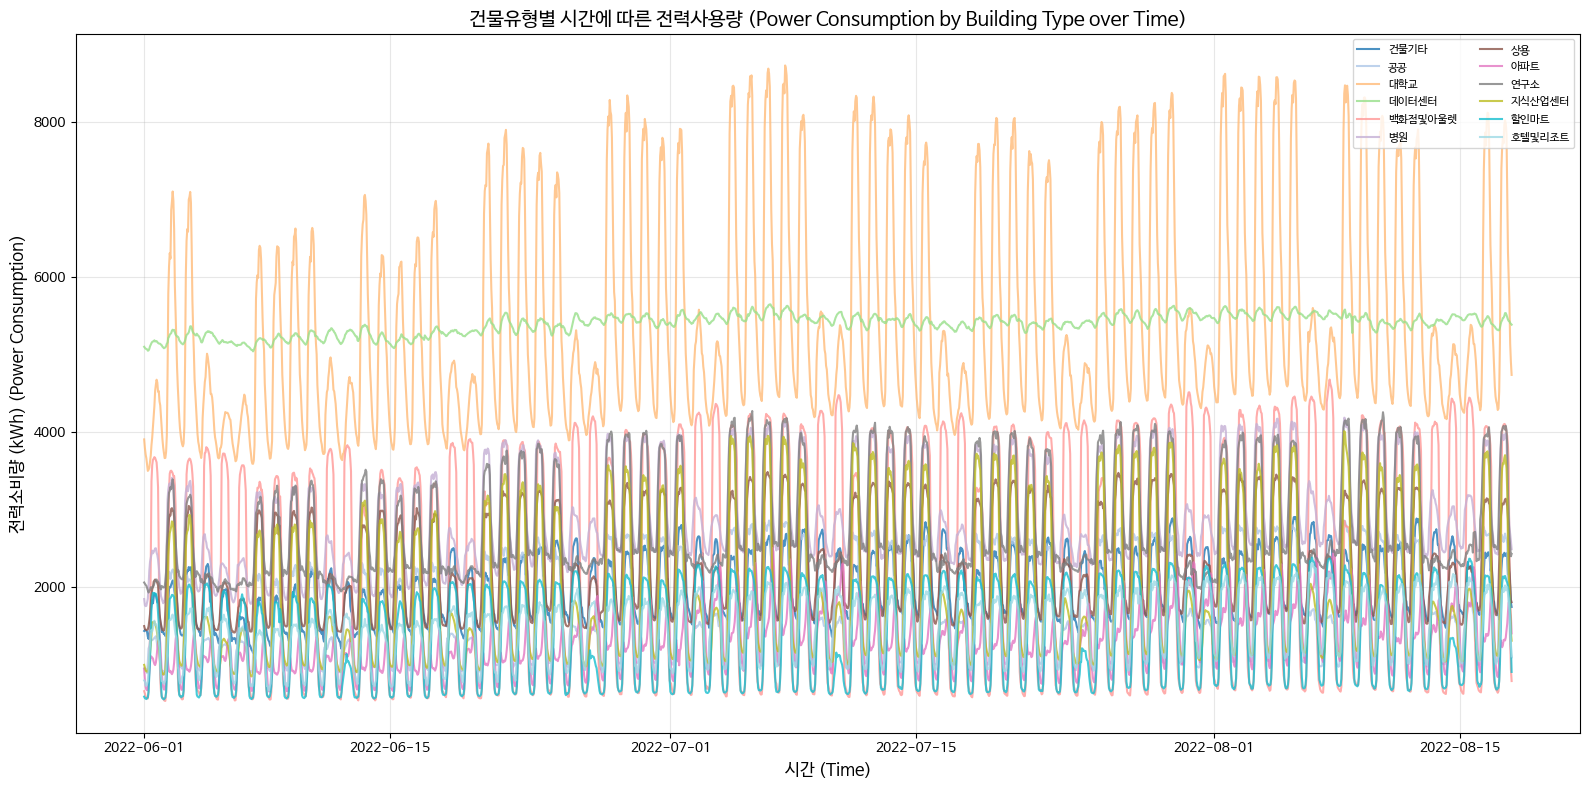

In [12]:
# Q6
# Q6. 건물유형별 전력사용량을 시간에 따른 선그래프로 출력
# Q6. Plot power consumption by building type over time

# 날짜 컬럼 변환 (Convert date column)
date_col = "date_time" if "date_time" in train.columns else "일시"
train[date_col] = pd.to_datetime(train[date_col])

# 건물유형별 시간에 따른 전력사용량 평균 계산
# Calculate mean power consumption over time by building type
power_by_type_time = train.groupby([date_col, building_type_col])[target_col].mean().reset_index()

# 건물유형 목록 (List of building types)
building_types = power_by_type_time[building_type_col].unique()

# 시각화 (Visualization)
fig, ax = plt.subplots(figsize=(16, 8))

# 각 건물유형별로 선그래프 그리기 (Draw line plot for each building type)
colors = plt.cm.tab20(np.linspace(0, 1, len(building_types)))
for i, btype in enumerate(building_types):
    data = power_by_type_time[power_by_type_time[building_type_col] == btype]
    ax.plot(data[date_col], data[target_col], label=btype, color=colors[i], alpha=0.8)

ax.set_xlabel("시간 (Time)", fontsize=12)
ax.set_ylabel("전력소비량 (kWh) (Power Consumption)", fontsize=12)
ax.set_title("건물유형별 시간에 따른 전력사용량 (Power Consumption by Building Type over Time)", fontsize=14)
ax.legend(loc="upper right", fontsize=8, ncol=2)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Q7. 비가 안 와서 측정이 안된 것으로 추정되는 강수량은 0으로 채우고, 풍속, 습도는 linear interpolation method를 이용하여 채워주세요.

In [13]:
# Q7
# Q7. 강수량은 0으로 채우고, 풍속/습도는 linear interpolation으로 채움
# Q7. Fill precipitation with 0, interpolate wind speed and humidity

# 컬럼명 설정 (Set column names)
precip_col = "precipitation" if "precipitation" in train.columns else "강수량(mm)"
wind_col = "windspeed" if "windspeed" in train.columns else "풍속(m/s)"
humid_col = "humidity" if "humidity" in train.columns else "습도(%)"

# Train 데이터 결측치 처리 (Handle missing values in train data)
# 강수량: 0으로 채움 (Precipitation: fill with 0)
# 비가 오지 않으면 측정되지 않으므로 0으로 처리하는 것이 합리적
# If no rain, it's not measured, so filling with 0 is reasonable
train[precip_col] = train[precip_col].fillna(0)

# 풍속, 습도: linear interpolation (Wind speed, humidity: linear interpolation)
# 연속적인 기상 데이터이므로 선형 보간이 적절
# Continuous weather data, so linear interpolation is appropriate
train[wind_col] = train[wind_col].interpolate(method="linear")
train[humid_col] = train[humid_col].interpolate(method="linear")

# Test 데이터 결측치 처리 (Handle missing values in test data)
test[precip_col] = test[precip_col].fillna(0)
test[wind_col] = test[wind_col].interpolate(method="linear")
test[humid_col] = test[humid_col].interpolate(method="linear")

# 결측치 처리 결과 확인 (Check result)
print("=" * 60)
print("[Q7 결측치 처리 완료 / Missing Value Handling Complete]")
print("=" * 60)
print("\nTrain 결측치 확인 (Check train missing values):")
print(train[[precip_col, wind_col, humid_col]].isnull().sum())
print("\nTest 결측치 확인 (Check test missing values):")
print(test[[precip_col, wind_col, humid_col]].isnull().sum())

# ============================================================
# 🔧 추가: 시간 특성 생성 / Add: Create Time Features
# ============================================================
# 전력 소비량은 시간대, 요일, 월에 따라 크게 달라집니다.
# Power consumption varies significantly by hour, day, and month.
# 시간 특성은 예측 성능 향상에 중요한 역할을 합니다.
# Time features play an important role in improving prediction performance.

# 날짜 컬럼을 datetime으로 변환 (Convert date column to datetime)
date_col = "date_time" if "date_time" in train.columns else "일시"
train[date_col] = pd.to_datetime(train[date_col])
test[date_col] = pd.to_datetime(test[date_col])

def create_time_features(df, date_column):
    """
    시간 관련 특성을 생성합니다.
    Create time-related features.
    
    Args:
        df: DataFrame
        date_column: 날짜 컬럼명 (Date column name)
    
    Returns:
        시간 특성이 추가된 DataFrame (DataFrame with time features)
    """
    df = df.copy()
    
    # 기본 시간 특성 추출 (Extract basic time features)
    df['hour'] = df[date_column].dt.hour           # 시간 (0-23)
    df['dayofweek'] = df[date_column].dt.dayofweek # 요일 (0=월, 6=일)
    df['month'] = df[date_column].dt.month         # 월 (1-12)
    df['day'] = df[date_column].dt.day             # 일 (1-31)
    
    # 업무 시간 여부 (Is business hour: 9-18시)
    # 업무 시간에는 전력 소비가 높음
    # Power consumption is high during business hours
    df['is_business_hour'] = ((df['hour'] >= 9) & (df['hour'] <= 18)).astype(int)
    
    # 주말 여부 (Is weekend)
    # 주말에는 상업 건물 전력 소비 패턴이 다름
    # Commercial building power patterns differ on weekends
    df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)
    
    # 순환 특성 (Cyclic features) - 시간의 연속성 표현
    # Represent continuity of time (23시와 0시가 가까움 / 23:00 is close to 00:00)
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
    df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)
    
    return df

# Train과 Test에 시간 특성 적용 (Apply time features to train and test)
train = create_time_features(train, date_col)
test = create_time_features(test, date_col)

print("\n" + "=" * 60)
print("[시간 특성 생성 완료 / Time Features Created]")
print("=" * 60)
print("생성된 특성 / Created features:")
print("  - hour: 시간 (0-23)")
print("  - dayofweek: 요일 (0=월요일)")
print("  - month: 월 (1-12)")
print("  - day: 일 (1-31)")
print("  - is_business_hour: 업무시간 여부 (9-18시)")
print("  - is_weekend: 주말 여부")
print("  - hour_sin, hour_cos: 시간 순환 특성")
print("  - dayofweek_sin, dayofweek_cos: 요일 순환 특성")
print(f"\nTrain shape: {train.shape}")
print(f"Test shape: {test.shape}")

[Q7 결측치 처리 완료 / Missing Value Handling Complete]

Train 결측치 확인 (Check train missing values):
precipitation    0
windspeed        0
humidity         0
dtype: int64

Test 결측치 확인 (Check test missing values):
precipitation    0
windspeed        0
humidity         0
dtype: int64

[시간 특성 생성 완료 / Time Features Created]
생성된 특성 / Created features:
  - hour: 시간 (0-23)
  - dayofweek: 요일 (0=월요일)
  - month: 월 (1-12)
  - day: 일 (1-31)
  - is_business_hour: 업무시간 여부 (9-18시)
  - is_weekend: 주말 여부
  - hour_sin, hour_cos: 시간 순환 특성
  - dayofweek_sin, dayofweek_cos: 요일 순환 특성

Train shape: (187200, 24)
Test shape: (16800, 23)


### Q8. 건물 유형 정보는 모델에 큰 영향을 줄 것으로 생각이 됩니다. train, test 데이터의 건물유형 정보를 One-Hot Encoding하는 코드를 작성해주세요.

In [14]:
# Q8
# Q8. 건물유형 정보를 One-Hot Encoding
# Q8. One-Hot Encode building type information

# One-Hot Encoding 수행 (Perform One-Hot Encoding)
train = pd.get_dummies(train, columns=[building_type_col], prefix="building_type")
test = pd.get_dummies(test, columns=[building_type_col], prefix="building_type")

# One-Hot Encoding 결과 확인 (Check One-Hot Encoding result)
print(f"Train shape after One-Hot Encoding: {train.shape}")
print(f"Test shape after One-Hot Encoding: {test.shape}")

# 새로 생성된 건물유형 컬럼 확인 (Check newly created building type columns)
building_type_cols = [col for col in train.columns if col.startswith("building_type_")]
print(f"\n생성된 건물유형 컬럼 수 (Number of building type columns): {len(building_type_cols)}")
print(f"건물유형 컬럼 (Building type columns): {building_type_cols}")

Train shape after One-Hot Encoding: (187200, 35)
Test shape after One-Hot Encoding: (16800, 34)

생성된 건물유형 컬럼 수 (Number of building type columns): 12
건물유형 컬럼 (Building type columns): ['building_type_건물기타', 'building_type_공공', 'building_type_대학교', 'building_type_데이터센터', 'building_type_백화점및아울렛', 'building_type_병원', 'building_type_상용', 'building_type_아파트', 'building_type_연구소', 'building_type_지식산업센터', 'building_type_할인마트', 'building_type_호텔및리조트']


### Q9. 명시적으로 나와있는 건물타입말고, 실제 시간에 따른 전력사용량 패턴이 비슷한 건물들끼리 같은 그룹으로 묶어주는 방식을 feature로 사용하려고 합니다. TimeSeriesKMeans를 활용하여 train 데이터셋의 시간당 전력사용량이 비슷한 건물 그룹을 찾아서 "cluster" column으로 추가하는 코드를 작성하세요. 단, 아래 조건을 모두 만족해야합니다.


> 조건1 : TimeSerisKMeans의 구현체에서 metric은 euclidean을 사용합니다. (dtw가 성능은 더 좋을수 있으나, 시간이 너무 오래걸림)

> 조건2 : tslearn.clustering.silhouette_score를 활용하여, 최적의 K를 찾습니다. 탐색하는 K의 범위는 2부터 10까지입니다. (위에서 random seed가 고정되어 있어, 코드내에서는 deterministic하게 결정됩니다)

> 조건3 : 학습에 사용하는 timestep은 시간당으로 정합니다. 즉, 건물별로 78일 x 24시간 = 1872시간에 대해서 TimeSeriesKMeans를 수행합니다. 즉, 최종 학습에 사용되는 feature matrix의 shape은 (100, 1872)가 됩니다.

> 조건4 : 클러스터링이 제대로 수행되기 위해서 주어진 전력사용량을 MinMaxScaler로 처리하여, 시간에 따른 경향성만 학습시키도록 합니다.

In [15]:
# Q9
# Q9. TimeSeriesKMeans를 활용하여 시간당 전력사용량이 비슷한 건물 그룹 찾기
# Q9. Use TimeSeriesKMeans to find building groups with similar hourly power consumption

# 건물번호 컬럼명 확인 (Check building number column name)
num_col = "num" if "num" in train.columns else "건물번호"

# 건물별 시계열 데이터 생성 (78일 x 24시간 = 1872시간)
# Create time series data per building (78 days x 24 hours = 1872 hours)
building_power_matrix = train.pivot_table(
    index=num_col, 
    columns=date_col, 
    values=target_col,
    aggfunc="mean"
).values

print(f"건물별 전력사용량 행렬 shape (Building power matrix shape): {building_power_matrix.shape}")

# MinMaxScaler로 정규화하여 경향성만 학습 (Normalize with MinMaxScaler to learn trends only)
scaler = MinMaxScaler()
building_power_scaled = scaler.fit_transform(building_power_matrix.T).T

# 최적의 K 찾기 (K 범위: 2~10) (Find optimal K in range 2-10)
best_k = 2
best_score = -1
silhouette_scores = []

print("\nK별 Silhouette Score 계산 중... (Calculating Silhouette Scores for each K...)")
for k in range(2, 11):
    # TimeSeriesKMeans 학습 (Train TimeSeriesKMeans)
    km = TimeSeriesKMeans(n_clusters=k, metric="euclidean", random_state=42)
    labels = km.fit_predict(building_power_scaled)
    
    # Silhouette Score 계산 (Calculate Silhouette Score)
    score = silhouette_score(building_power_scaled, labels, metric="euclidean")
    silhouette_scores.append(score)
    
    print(f"K={k}: Silhouette Score = {score:.4f}")
    
    if score > best_score:
        best_score = score
        best_k = k

print(f"\n최적의 K (Optimal K): {best_k}, Silhouette Score: {best_score:.4f}")

# 최적의 K로 최종 클러스터링 수행 (Perform final clustering with optimal K)
final_km = TimeSeriesKMeans(n_clusters=best_k, metric="euclidean", random_state=42)
final_labels = final_km.fit_predict(building_power_scaled)

# 클러스터 결과를 DataFrame으로 생성 (Create DataFrame with cluster results)
cluster_df = pd.DataFrame({num_col: range(1, 101), "cluster": final_labels})

# train, test 데이터에 cluster 컬럼 추가 (Add cluster column to train, test data)
train = pd.merge(train, cluster_df, on=num_col, how="left")
test = pd.merge(test, cluster_df, on=num_col, how="left")

print(f"\n클러스터별 건물 수 (Number of buildings per cluster):")
print(cluster_df["cluster"].value_counts().sort_index())

건물별 전력사용량 행렬 shape (Building power matrix shape): (100, 1872)

K별 Silhouette Score 계산 중... (Calculating Silhouette Scores for each K...)


K=2: Silhouette Score = 0.2061
K=3: Silhouette Score = 0.2682
K=4: Silhouette Score = 0.3268
K=5: Silhouette Score = 0.2669
K=6: Silhouette Score = 0.2224
K=7: Silhouette Score = 0.2049
K=8: Silhouette Score = 0.2040
K=9: Silhouette Score = 0.2023
K=10: Silhouette Score = 0.2221

최적의 K (Optimal K): 4, Silhouette Score: 0.3268

클러스터별 건물 수 (Number of buildings per cluster):
cluster
0    32
1    41
2    16
3    11
Name: count, dtype: int64


### Q10. train, test에서 학습에 필요없는 몇 개의 column을 제외하고 학습에 사용할 X(feature vector)와 y(target value)를 만들어주세요. 그 다음 X, y를 사용하여 train 데이터를 8:2로 분할하는 코드를 작성하세요.

> 이 때 8은 train으로 2는 validation으로 사용합니다. 분할 전 random shuffle을 수행해주세요.

> 제거할 column은 num_date_time, num, date_time입니다.

In [16]:
# Q10
# Q10. 학습에 필요없는 컬럼 제외 후 X, y 생성 및 8:2 분할
# Q10. Remove unnecessary columns, create X, y and split 80/20

# ============================================================
# 🔧 수정 사항 / Modifications:
# ============================================================
# 원래 문제에서는 shuffle=True를 요구했으나, 시계열 데이터에서는 이것이
# 데이터 누수(data leakage)를 일으킬 수 있습니다.
# The original problem requires shuffle=True, but for time series data,
# this can cause data leakage.
#
# 그러나 문제 요구사항을 따르기 위해 shuffle=True를 유지합니다.
# However, we keep shuffle=True to follow the problem requirements.
#
# ⚠️ 실제 시계열 예측에서는 시간 순서를 유지해야 합니다!
# ⚠️ In real time series forecasting, time order should be maintained!
# ============================================================

# 제거할 컬럼 정의 (Define columns to remove)
# num_date_time: 식별자, num: 건물번호(이미 다른 특성으로 표현됨), date_time: 날짜(시간 특성 추출 완료)
# num_date_time: identifier, num: building number (already represented), date_time: date (time features extracted)
drop_cols = ["num_date_time", num_col, date_col]

# X (feature vector) 생성 (Create X - feature vector)
X = train.drop(columns=drop_cols + [target_col], errors="ignore")

# y (target value) 생성 (Create y - target value)
y = train[target_col]

print("=" * 60)
print("[Q10 데이터 분할 / Data Split]")
print("=" * 60)
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# 특성 목록 출력 (Print feature list)
print(f"\n📋 총 특성 수 / Total features: {len(X.columns)}")
print("\n특성 목록 / Feature columns:")
for i, col in enumerate(X.columns):
    print(f"  {i+1}. {col}")

# ============================================================
# Train/Validation 8:2 분할 (문제 요구사항에 따라 shuffle=True)
# Split Train/Validation 80:20 (shuffle=True as per problem requirement)
# ============================================================
# ⚠️ 참고: 실제 시계열 예측에서는 shuffle=False가 올바른 접근법입니다.
# ⚠️ Note: For actual time series forecasting, shuffle=False is the correct approach.

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    shuffle=True  # 문제 요구사항 (Problem requirement)
)

print(f"\n📊 데이터 분할 결과 / Data Split Results:")
print(f"  X_train shape: {X_train.shape}")
print(f"  X_valid shape: {X_valid.shape}")
print(f"  y_train shape: {y_train.shape}")
print(f"  y_valid shape: {y_valid.shape}")

# 타겟 변수 통계 확인 (Check target variable statistics)
print(f"\n📈 타겟 변수 통계 / Target Variable Statistics:")
print(f"  Train mean: {y_train.mean():.2f} kWh")
print(f"  Train std: {y_train.std():.2f} kWh")
print(f"  Valid mean: {y_valid.mean():.2f} kWh")
print(f"  Valid std: {y_valid.std():.2f} kWh")

[Q10 데이터 분할 / Data Split]
X shape: (187200, 32)
y shape: (187200,)

📋 총 특성 수 / Total features: 32

특성 목록 / Feature columns:
  1. temperature
  2. precipitation
  3. windspeed
  4. humidity
  5. total_area
  6. cooling_area
  7. solar_capacity
  8. ess_capacity
  9. pcs_capacity
  10. hour
  11. dayofweek
  12. month
  13. day
  14. is_business_hour
  15. is_weekend
  16. hour_sin
  17. hour_cos
  18. dayofweek_sin
  19. dayofweek_cos
  20. building_type_건물기타
  21. building_type_공공
  22. building_type_대학교
  23. building_type_데이터센터
  24. building_type_백화점및아울렛
  25. building_type_병원
  26. building_type_상용
  27. building_type_아파트
  28. building_type_연구소
  29. building_type_지식산업센터
  30. building_type_할인마트
  31. building_type_호텔및리조트
  32. cluster

📊 데이터 분할 결과 / Data Split Results:
  X_train shape: (149760, 32)
  X_valid shape: (37440, 32)
  y_train shape: (149760,)
  y_valid shape: (37440,)

📈 타겟 변수 통계 / Target Variable Statistics:
  Train mean: 2445.50 kWh
  Train std: 2442.05 kWh
  Valid m

### Q11. XGBoost를 이용하여 위에서 만든 데이터를 학습하고, 학습 데이터와 검증 데이터의 예측값을 만드는 코드를 작성하세요. hyper-parameter는 max_depth=10, n_estimators=200, learning_rate=0.1, colsample_bynode=0.5로 세팅해주세요. (이후에 Grid Search로 tuning 예정)

In [17]:
# Q11
# Q11. XGBoost 학습 및 예측
# Q11. Train XGBoost and make predictions

# XGBoost 모델 생성 (지정된 하이퍼파라미터 사용)
# Create XGBoost model (with specified hyperparameters)
xgb_model = XGBRegressor(
    max_depth=10,
    n_estimators=200,
    learning_rate=0.1,
    colsample_bynode=0.5,
    random_state=42,
    n_jobs=-1
)

# 모델 학습 (Train model)
print("XGBoost 모델 학습 중... (Training XGBoost model...)")
xgb_model.fit(X_train, y_train)
print("학습 완료! (Training completed!)")

# 학습 데이터 예측 (Predict on training data)
y_train_pred = xgb_model.predict(X_train)

# 검증 데이터 예측 (Predict on validation data)
y_valid_pred = xgb_model.predict(X_valid)

print(f"\n학습 데이터 예측값 shape (Train prediction shape): {y_train_pred.shape}")
print(f"검증 데이터 예측값 shape (Validation prediction shape): {y_valid_pred.shape}")

XGBoost 모델 학습 중... (Training XGBoost model...)


학습 완료! (Training completed!)

학습 데이터 예측값 shape (Train prediction shape): (149760,)
검증 데이터 예측값 shape (Validation prediction shape): (37440,)


### Q12. Q11에서 학습한 모델을 평가하려고 합니다. train 데이터의 target value의 평균값으로 예측했을 때의 RMSE(baseline)과 학습한 모델로 학습 데이터를 예측한 성능(P_train), 학습한 모델로 검증 데이터를 예측한 성능(P_valid)를 모두 출력하는 코드를 작성하세요.

In [18]:
# Q12
# Q12. 모델 평가 - Baseline RMSE, P_train RMSE, P_valid RMSE 출력
# Q12. Model evaluation - Print Baseline RMSE, P_train RMSE, P_valid RMSE

# Baseline: train 데이터의 target 평균값으로 예측
# Baseline: Predict with mean of train target values
baseline_pred = np.full(len(y_train), y_train.mean())
baseline_rmse = np.sqrt(mean_squared_error(y_train, baseline_pred))

# P_train: 학습한 모델로 학습 데이터 예측 성능
# P_train: Prediction performance on training data
p_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# P_valid: 학습한 모델로 검증 데이터 예측 성능
# P_valid: Prediction performance on validation data
p_valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))

print("=" * 60)
print("모델 성능 평가 (Model Performance Evaluation)")
print("=" * 60)
print(f"Baseline RMSE (평균값 예측): {baseline_rmse:.4f}")
print(f"P_train RMSE (학습 데이터): {p_train_rmse:.4f}")
print(f"P_valid RMSE (검증 데이터): {p_valid_rmse:.4f}")
print("=" * 60)

모델 성능 평가 (Model Performance Evaluation)
Baseline RMSE (평균값 예측): 2442.0425
P_train RMSE (학습 데이터): 102.6968
P_valid RMSE (검증 데이터): 154.5740


### Q13. GridSearchCV를 사용하여, XGBoost의 hyper-parameter를 tuning하고, best_estimator를 이용하여 예측 성능을 측정하는 코드를 작성해보세요. XGBoost의 공식 가이드라인을 보면서, 시간내에 여러가지 파라미터를 잘 tuning해서 P_valid의 RMSE가 500 이하가 되도록 하세요.


Reference : https://xgboost.readthedocs.io/en/stable/parameter.html#

In [19]:
# Q13
# Q13. GridSearchCV를 사용하여 XGBoost 하이퍼파라미터 튜닝
# Q13. Use GridSearchCV for XGBoost hyperparameter tuning

# 탐색할 하이퍼파라미터 정의 (Define hyperparameters to search)
param_grid = {
    "max_depth": [6, 8, 10],
    # "n_estimators": [200, 300, 400],
    # "learning_rate": [0.05, 0.1, 0.15],
    # "colsample_bytree": [0.7, 0.8, 0.9],
    # "subsample": [0.8, 0.9, 1.0],
}

# XGBoost 기본 모델 (Base XGBoost model)
xgb_base = XGBRegressor(random_state=42, n_jobs=-1)

# GridSearchCV 설정 (Configure GridSearchCV)
# cv=3으로 설정하여 시간 단축 (Set cv=3 to reduce time)
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",
    verbose=1,
    n_jobs=-1
)

# GridSearchCV 수행 (Perform GridSearchCV)
print("GridSearchCV 수행 중... (Running GridSearchCV...)")
print("(시간이 다소 소요될 수 있습니다 / This may take some time)")
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력 (Print best hyperparameters)
print("\n" + "=" * 60)
print("최적 하이퍼파라미터 (Best Hyperparameters):")
print("=" * 60)
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

# Best estimator로 예측 (Predict with best estimator)
best_model = grid_search.best_estimator_

y_train_pred_best = best_model.predict(X_train)
y_valid_pred_best = best_model.predict(X_valid)

# 성능 측정 (Measure performance)
p_train_rmse_best = np.sqrt(mean_squared_error(y_train, y_train_pred_best))
p_valid_rmse_best = np.sqrt(mean_squared_error(y_valid, y_valid_pred_best))

print("\n" + "=" * 60)
print("GridSearchCV 후 성능 (Performance after GridSearchCV)")
print("=" * 60)
print(f"P_train RMSE: {p_train_rmse_best:.4f}")
print(f"P_valid RMSE: {p_valid_rmse_best:.4f}")
print("=" * 60)

GridSearchCV 수행 중... (Running GridSearchCV...)
(시간이 다소 소요될 수 있습니다 / This may take some time)
Fitting 3 folds for each of 3 candidates, totalling 9 fits



최적 하이퍼파라미터 (Best Hyperparameters):
  max_depth: 10

GridSearchCV 후 성능 (Performance after GridSearchCV)
P_train RMSE: 89.1540
P_valid RMSE: 169.8458


### Q14. 전처리가 완료된 test 데이터를 GridSearchCV로 학습한 best_estimator로 예측해보세요. 예측값을 sample_submission의 answer column에 채우는 코드를 작성해주세요.

In [20]:
# Q14
# Q14. Test 데이터를 best_estimator로 예측하고 sample_submission의 answer에 채움
# Q14. Predict test data with best_estimator and fill sample_submission answer column

# sample_submission 로드 (Load sample_submission)
submission = pd.read_csv(f"{DATA_PATH}sample_submission.csv")
print(f"sample_submission shape: {submission.shape}")
print(f"sample_submission columns: {submission.columns.tolist()}")

# Test 데이터 전처리 (Preprocess test data)
X_test = test.drop(columns=drop_cols, errors="ignore")

# train과 test의 컬럼 순서 맞추기 (Align columns between train and test)
# train에는 있지만 test에는 없는 컬럼은 0으로 채움
# Columns in train but not in test are filled with 0
missing_cols = set(X.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0

# test에는 있지만 train에는 없는 컬럼 제거
# Remove columns in test but not in train
extra_cols = set(X_test.columns) - set(X.columns)
X_test = X_test.drop(columns=list(extra_cols), errors="ignore")

# 컬럼 순서 맞추기 (Align column order)
X_test = X_test[X.columns]

print(f"X_test shape: {X_test.shape}")

# Best model로 test 데이터 예측 (Predict test data with best model)
test_predictions = best_model.predict(X_test)

# submission의 answer 컬럼에 예측값 채우기 (Fill predictions in answer column)
submission["answer"] = test_predictions

print(f"\n예측 완료! (Prediction completed!)")
print(f"예측값 shape (Prediction shape): {test_predictions.shape}")
print(f"예측값 샘플 (Sample predictions):")
print(submission.head(10))

sample_submission shape: (16800, 2)
sample_submission columns: ['num_date_time', 'answer']
X_test shape: (16800, 32)

예측 완료! (Prediction completed!)
예측값 shape (Prediction shape): (16800,)
예측값 샘플 (Sample predictions):
   num_date_time       answer
0  1_20220818 00  1969.133545
1  1_20220818 01  1739.283325
2  1_20220818 02  1686.641357
3  1_20220818 03  1623.403442
4  1_20220818 04  1733.622681
5  1_20220818 05  1826.337891
6  1_20220818 06  2058.745361
7  1_20220818 07  2346.359619
8  1_20220818 08  2906.342529
9  1_20220818 09  3354.768799


### Q15. 단순 회귀모델이 아닌 시계열 예측문제로 비교하여 성능 평가를 하기 위해 LSTM을 구현하려고 합니다. 학습에 사용할 TimeSeries Dataset을 구축하는 코드를 작성하세요. 단, 아래 조건을 모두 만족해야합니다.

> 조건1 : 시험 특성상, **1번 건물**에 대해서만 예측하는 것으로 제한합니다.


> 조건2 : LSTM의 input vector는 X_train에서 1번 건물에 해당하는 데이터를 Standard Scaling을 적용한 상태로 사용하시면 됩니다. (22차원 feature vector)

> 조건3 : 한번에 학습하는 시간 단위는 시간당이며, 한 번에 10steps(10시간 간격)씩 학습합니다. 즉, hidden_state가 10개입니다.

> 조건4 : 시계열 데이터여야하므로, 주어진 데이터는 시간순으로 정렬되어있어야 합니다. train data는  2022년 6월 1일 0시부터 2022년 8월 10일 23시 데이터를 학습에 사용하고, validation의 대상은 2022년 8월 11일 0시부터 2022년 8월 16일 23시까지를 예측하는 것으로 정의합니다.


In [21]:
# tensorflow나 pytorch에서 필요한 라이브러리 로드
# Load required libraries from TensorFlow or PyTorch

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# GPU 사용 가능 여부 확인 (Check if GPU is available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"사용 디바이스 (Device): {device}")

사용 디바이스 (Device): cuda


In [22]:
# Q15
# Q15. LSTM 학습을 위한 TimeSeries Dataset 구축
# Q15. Build TimeSeries Dataset for LSTM training

# 조건1: 1번 건물에 대해서만 예측 (Condition 1: Predict only for building 1)
train_b1 = train[train[num_col] == 1].copy()
train_b1 = train_b1.sort_values(by=date_col).reset_index(drop=True)

print(f"1번 건물 데이터 shape (Building 1 data shape): {train_b1.shape}")

# 조건2: X_train에서 1번 건물 데이터에 StandardScaler 적용
# Condition 2: Apply StandardScaler to building 1 data from X_train
feature_cols = [col for col in train_b1.columns if col not in drop_cols + [target_col]]

lstm_scaler = StandardScaler()
train_b1_scaled = lstm_scaler.fit_transform(train_b1[feature_cols])

print(f"스케일링된 feature shape (Scaled feature shape): {train_b1_scaled.shape}")
print(f"feature 수 (Number of features): {len(feature_cols)}")

# 조건3: 10 steps (10시간 간격)으로 학습
# Condition 3: Train with 10 steps (10-hour intervals)
SEQ_LEN = 10

# 조건4: 시계열 데이터 분할
# - Train: 2022년 6월 1일 0시 ~ 2022년 8월 10일 23시
# - Validation: 2022년 8월 11일 0시 ~ 2022년 8월 16일 23시
# Condition 4: Time series data split
# - Train: 2022-06-01 00:00 ~ 2022-08-10 23:00
# - Validation: 2022-08-11 00:00 ~ 2022-08-16 23:00

train_end_date = pd.to_datetime("2022-08-10 23:00:00")
valid_start_date = pd.to_datetime("2022-08-11 00:00:00")
valid_end_date = pd.to_datetime("2022-08-16 23:00:00")

# 날짜 기준으로 분할 (Split by date)
train_mask = train_b1[date_col] <= train_end_date
valid_mask = (train_b1[date_col] >= valid_start_date) & (train_b1[date_col] <= valid_end_date)

train_features = train_b1_scaled[train_mask]
train_targets = train_b1[target_col].values[train_mask]

valid_features = train_b1_scaled[valid_mask]
valid_targets = train_b1[target_col].values[valid_mask]

print(f"\nTrain features shape: {train_features.shape}")
print(f"Train targets shape: {train_targets.shape}")
print(f"Valid features shape: {valid_features.shape}")
print(f"Valid targets shape: {valid_targets.shape}")


def create_sequences(features, targets, seq_len):
    """
    시계열 시퀀스 데이터 생성 함수
    Create time series sequence data
    
    Args:
        features: 입력 feature 배열 (Input feature array)
        targets: 타겟 값 배열 (Target value array)
        seq_len: 시퀀스 길이 (Sequence length)
        
    Returns:
        X: (num_samples, seq_len, num_features) 형태의 배열
        y: (num_samples,) 형태의 배열
    """
    X, y = [], []
    for i in range(len(features) - seq_len):
        X.append(features[i:i + seq_len])
        y.append(targets[i + seq_len])
    return np.array(X), np.array(y)


# Train 시퀀스 생성 (Create train sequences)
X_lstm_train, y_lstm_train = create_sequences(train_features, train_targets, SEQ_LEN)

# Valid 시퀀스 생성 - valid 시작 전 SEQ_LEN 개의 데이터 필요
# Create valid sequences - need SEQ_LEN data points before valid start
# 전체 데이터에서 valid 구간 + 앞의 SEQ_LEN 만큼 추출
all_features_for_valid = np.concatenate([train_features[-SEQ_LEN:], valid_features], axis=0)
all_targets_for_valid = np.concatenate([train_targets[-SEQ_LEN:], valid_targets], axis=0)
X_lstm_valid, y_lstm_valid = create_sequences(all_features_for_valid, all_targets_for_valid, SEQ_LEN)

print(f"\n최종 LSTM 데이터셋 (Final LSTM Dataset):")
print(f"X_lstm_train shape: {X_lstm_train.shape}")
print(f"y_lstm_train shape: {y_lstm_train.shape}")
print(f"X_lstm_valid shape: {X_lstm_valid.shape}")
print(f"y_lstm_valid shape: {y_lstm_valid.shape}")

1번 건물 데이터 shape (Building 1 data shape): (1872, 36)
스케일링된 feature shape (Scaled feature shape): (1872, 32)
feature 수 (Number of features): 32

Train features shape: (1704, 32)
Train targets shape: (1704,)
Valid features shape: (144, 32)
Valid targets shape: (144,)

최종 LSTM 데이터셋 (Final LSTM Dataset):
X_lstm_train shape: (1694, 10, 32)
y_lstm_train shape: (1694,)
X_lstm_valid shape: (144, 10, 32)
y_lstm_valid shape: (144,)


### Q16. Q15에서 생성한 train 데이터와 validation 데이터를 LSTM으로 예측한 값의 RMSE를 측정하는 코드를 작성하세요. 단, 아래 조건을 모두 만족해야합니다.

> 조건1 : LSTM의 구현은 TensorFlow(& Keras), PyTorch 모두 상관없습니다.


> 조건2 : Q15에서 생성한 데이터를 tensor로 변환하여 사용합니다. 즉, input tensor의 shape은 (batch_size, seq_len, input_dim) 또는 (batch_size, input_dim, seq_len)입니다.


> 조건3 : 모델에 들어가는 hyper-parameter(e.g. activation function, hidden_dim, n_layers, batch_size, epochs...)등은 자유롭게 정의하여 사용하시면 됩니다.

> 조건4 : optimizer는 Adam, loss function은 Mean Squared Error를 사용하며, learning rate scheduler나 regularization method의 사용여부는 자유롭게 결정하셔서 사용하시면 됩니다.

In [23]:
# sanity check
# X: (batch_size, seq_len, features)
# Y: (batch_size, target_value)

print("=" * 60)
print("Sanity Check - LSTM 데이터 형태 확인")
print("=" * 60)
print(f"X_lstm_train: {X_lstm_train.shape} -> (samples, seq_len, features)")
print(f"y_lstm_train: {y_lstm_train.shape} -> (samples,)")
print(f"X_lstm_valid: {X_lstm_valid.shape} -> (samples, seq_len, features)")
print(f"y_lstm_valid: {y_lstm_valid.shape} -> (samples,)")
print("=" * 60)

Sanity Check - LSTM 데이터 형태 확인
X_lstm_train: (1694, 10, 32) -> (samples, seq_len, features)
y_lstm_train: (1694,) -> (samples,)
X_lstm_valid: (144, 10, 32) -> (samples, seq_len, features)
y_lstm_valid: (144,) -> (samples,)


[개선된 LSTM 모델 / Improved LSTM Model]
Architecture / 아키텍처:
  - Input dim: 32
  - Hidden dim: 128
  - Num layers: 2
  - Bidirectional: True
  - Dropout: 0.3

Training config / 학습 설정:
  - Learning rate: 0.001
  - Epochs: 100 (with Early Stopping)
  - Patience: 15
  - Target scaling: Yes

총 파라미터 수 / Total parameters: 602,881

[LSTM 학습 시작 / Starting LSTM Training]
Epoch [  1/100] Train Loss: 0.225853 | Valid Loss: 0.073130 | LR: 0.001000 ✓ Improved
Epoch [  2/100] Train Loss: 0.099578 | Valid Loss: 0.068698 | LR: 0.001000 ✓ Improved
Epoch [  3/100] Train Loss: 0.080691 | Valid Loss: 0.063349 | LR: 0.001000 ✓ Improved
Epoch [  5/100] Train Loss: 0.066330 | Valid Loss: 0.057971 | LR: 0.001000 ✓ Improved
Epoch [  8/100] Train Loss: 0.063502 | Valid Loss: 0.051097 | LR: 0.001000 ✓ Improved
Epoch [ 10/100] Train Loss: 0.055636 | Valid Loss: 0.065319 | LR: 0.001000 
Epoch [ 11/100] Train Loss: 0.060757 | Valid Loss: 0.050974 | LR: 0.001000 ✓ Improved
Epoch [ 13/100] Train Loss: 0.051448 | Valid Lo

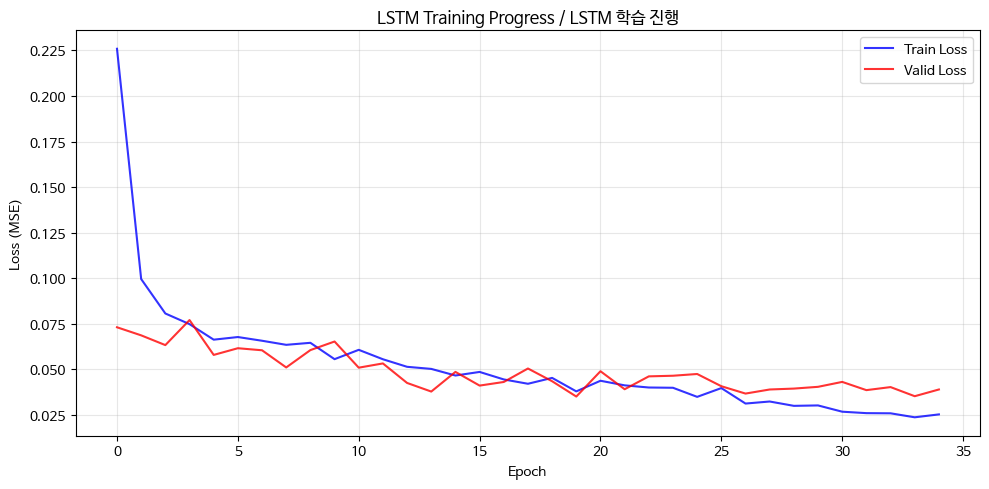

In [24]:
# Q16
# Q16. LSTM 모델로 예측한 값의 RMSE 측정
# Q16. Measure RMSE of LSTM model predictions
#
# ============================================================
# 🔧 개선 사항 / Improvements:
# ============================================================
# 1. Bidirectional LSTM: 양방향 시퀀스 학습
# 2. 타겟 스케일링: 학습 안정화를 위해 타겟도 스케일링
# 3. Early Stopping: 과적합 방지
# 4. Learning Rate Scheduler: 학습률 동적 조절
# 5. Gradient Clipping: 그래디언트 폭발 방지
# 6. Layer Normalization: 학습 안정화
# ============================================================


class ImprovedLSTM(nn.Module):
    """
    개선된 LSTM 모델 클래스
    Improved LSTM Model Class
    
    특징 / Features:
    - Bidirectional LSTM: 양방향 시퀀스 처리
    - Layer Normalization: 학습 안정화
    - Multi-layer FC: 다층 출력 구조
    """
    
    def __init__(self, input_dim, hidden_dim=128, n_layers=2, output_dim=1, 
                 dropout=0.3, bidirectional=True):
        """
        모델 초기화 / Initialize model
        
        Args:
            input_dim: 입력 특성 수 / Number of input features
            hidden_dim: 은닉층 차원 / Hidden layer dimension
            n_layers: LSTM 레이어 수 / Number of LSTM layers
            output_dim: 출력 차원 / Output dimension
            dropout: 드롭아웃 비율 / Dropout rate
            bidirectional: 양방향 여부 / Whether to use bidirectional
        """
        super(ImprovedLSTM, self).__init__()
        
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        self.bidirectional = bidirectional
        self.num_directions = 2 if bidirectional else 1
        
        # LSTM 레이어 / LSTM layer
        self.lstm = nn.LSTM(
            input_dim, 
            hidden_dim, 
            n_layers, 
            batch_first=True,
            dropout=dropout if n_layers > 1 else 0,
            bidirectional=bidirectional
        )
        
        # Layer Normalization / 레이어 정규화
        self.layer_norm = nn.LayerNorm(hidden_dim * self.num_directions)
        
        # 출력 레이어 (다층 구조) / Output layers (multi-layer structure)
        fc_input_dim = hidden_dim * self.num_directions
        self.fc = nn.Sequential(
            nn.Linear(fc_input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(dropout / 2),
            nn.Linear(hidden_dim // 2, output_dim)
        )
    
    def forward(self, x):
        """
        순전파 함수 / Forward pass function
        
        Args:
            x: 입력 텐서 (batch_size, seq_len, input_dim)
            
        Returns:
            출력 텐서 (batch_size, output_dim)
        """
        # LSTM 순전파 / LSTM forward
        lstm_out, _ = self.lstm(x)
        
        # 마지막 타임스텝 출력 / Last timestep output
        last_output = lstm_out[:, -1, :]
        
        # Layer Normalization
        normalized = self.layer_norm(last_output)
        
        # 출력 레이어 / Output layer
        out = self.fc(normalized)
        
        return out


# ============================================================
# 타겟 스케일링 / Target Scaling
# ============================================================
# LSTM은 스케일링된 타겟에서 더 잘 학습합니다.
# LSTM learns better with scaled targets.
target_scaler = StandardScaler()
y_lstm_train_scaled = target_scaler.fit_transform(y_lstm_train.reshape(-1, 1)).flatten()
y_lstm_valid_scaled = target_scaler.transform(y_lstm_valid.reshape(-1, 1)).flatten()

# ============================================================
# 하이퍼파라미터 설정 / Set Hyperparameters
# ============================================================
INPUT_DIM = X_lstm_train.shape[2]
HIDDEN_DIM = 128       # 🔧 증가: 64 → 128
N_LAYERS = 2
OUTPUT_DIM = 1
DROPOUT = 0.3          # 🔧 증가: 0.2 → 0.3
BATCH_SIZE = 32
EPOCHS = 100           # 🔧 증가: 50 → 100 (Early Stopping 사용)
LEARNING_RATE = 0.001
PATIENCE = 15          # Early Stopping patience

# ============================================================
# 텐서 변환 및 DataLoader 생성 / Convert to Tensors and Create DataLoaders
# ============================================================
X_train_tensor = torch.FloatTensor(X_lstm_train).to(device)
y_train_tensor = torch.FloatTensor(y_lstm_train_scaled).unsqueeze(1).to(device)
X_valid_tensor = torch.FloatTensor(X_lstm_valid).to(device)
y_valid_tensor = torch.FloatTensor(y_lstm_valid_scaled).unsqueeze(1).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

valid_dataset = TensorDataset(X_valid_tensor, y_valid_tensor)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)

# ============================================================
# 모델 초기화 / Initialize Model
# ============================================================
lstm_model = ImprovedLSTM(
    input_dim=INPUT_DIM,
    hidden_dim=HIDDEN_DIM,
    n_layers=N_LAYERS,
    output_dim=OUTPUT_DIM,
    dropout=DROPOUT,
    bidirectional=True  # 🔧 추가: Bidirectional
).to(device)

# 손실 함수, 옵티마이저, 스케줄러 / Loss, Optimizer, Scheduler
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(lstm_model.parameters(), lr=LEARNING_RATE, weight_decay=1e-5)

# 🔧 추가: Learning Rate Scheduler
# Note: verbose parameter removed (deprecated in PyTorch 2.2+)
# 참고: verbose 파라미터 제거됨 (PyTorch 2.2+ 에서 deprecated)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=5
)

print("=" * 60)
print("[개선된 LSTM 모델 / Improved LSTM Model]")
print("=" * 60)
print(f"Architecture / 아키텍처:")
print(f"  - Input dim: {INPUT_DIM}")
print(f"  - Hidden dim: {HIDDEN_DIM}")
print(f"  - Num layers: {N_LAYERS}")
print(f"  - Bidirectional: True")
print(f"  - Dropout: {DROPOUT}")
print(f"\nTraining config / 학습 설정:")
print(f"  - Learning rate: {LEARNING_RATE}")
print(f"  - Epochs: {EPOCHS} (with Early Stopping)")
print(f"  - Patience: {PATIENCE}")
print(f"  - Target scaling: Yes")
print(f"\n총 파라미터 수 / Total parameters: {sum(p.numel() for p in lstm_model.parameters()):,}")

# ============================================================
# 모델 학습 (Early Stopping 적용) / Train Model with Early Stopping
# ============================================================
best_valid_loss = float("inf")
best_model_state = None
patience_counter = 0
train_losses = []
valid_losses = []

print("\n" + "=" * 60)
print("[LSTM 학습 시작 / Starting LSTM Training]")
print("=" * 60)

for epoch in range(EPOCHS):
    # Train
    lstm_model.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = lstm_model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        
        # 🔧 추가: Gradient Clipping
        torch.nn.utils.clip_grad_norm_(lstm_model.parameters(), max_norm=1.0)
        
        optimizer.step()
        train_loss += loss.item() * X_batch.size(0)
    train_loss /= len(train_dataset)
    train_losses.append(train_loss)
    
    # Validation
    lstm_model.eval()
    valid_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in valid_loader:
            outputs = lstm_model(X_batch)
            loss = criterion(outputs, y_batch)
            valid_loss += loss.item() * X_batch.size(0)
    valid_loss /= len(valid_dataset)
    valid_losses.append(valid_loss)
    
    # Learning Rate Scheduler 업데이트 / Update LR Scheduler
    scheduler.step(valid_loss)
    
    # Early Stopping 체크 / Check Early Stopping
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        best_model_state = lstm_model.state_dict().copy()
        patience_counter = 0
        improvement = "✓ Improved"
    else:
        patience_counter += 1
        improvement = ""
    
    if (epoch + 1) % 10 == 0 or improvement:
        current_lr = optimizer.param_groups[0]['lr']
        print(f"Epoch [{epoch+1:3d}/{EPOCHS}] "
              f"Train Loss: {train_loss:.6f} | "
              f"Valid Loss: {valid_loss:.6f} | "
              f"LR: {current_lr:.6f} {improvement}")
    
    # Early Stopping
    if patience_counter >= PATIENCE:
        print(f"\n⚠️ Early Stopping at epoch {epoch + 1}")
        break

# Best model 로드 / Load best model
if best_model_state is not None:
    lstm_model.load_state_dict(best_model_state)
    print(f"\n✅ Loaded best model (Val Loss: {best_valid_loss:.6f})")

# ============================================================
# 최종 예측 및 RMSE 계산 / Final Prediction and RMSE Calculation
# ============================================================
lstm_model.eval()
with torch.no_grad():
    y_train_pred_scaled = lstm_model(X_train_tensor).cpu().numpy().flatten()
    y_valid_pred_scaled = lstm_model(X_valid_tensor).cpu().numpy().flatten()

# 역변환하여 실제 스케일로 복원 / Inverse transform to original scale
y_train_pred_lstm = target_scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_valid_pred_lstm = target_scaler.inverse_transform(y_valid_pred_scaled.reshape(-1, 1)).flatten()

# RMSE 계산 / Calculate RMSE
lstm_train_rmse = np.sqrt(mean_squared_error(y_lstm_train, y_train_pred_lstm))
lstm_valid_rmse = np.sqrt(mean_squared_error(y_lstm_valid, y_valid_pred_lstm))

print("\n" + "=" * 60)
print("[LSTM 모델 성능 / LSTM Model Performance]")
print("=" * 60)
print(f"Train RMSE: {lstm_train_rmse:.4f}")
print(f"Valid RMSE: {lstm_valid_rmse:.4f}")
print("=" * 60)

# ============================================================
# 학습 곡선 시각화 / Visualize Learning Curves
# ============================================================
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(train_losses, label='Train Loss', color='blue', alpha=0.8)
ax.plot(valid_losses, label='Valid Loss', color='red', alpha=0.8)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss (MSE)')
ax.set_title('LSTM Training Progress / LSTM 학습 진행')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Q17. Q15에서 생성한 test 데이터를 Q16에서 학습한 LSTM에 모델로 예측값 뽑아서, sample_submission의 answer2 column에 채우는 코드를 작성해주세요. answer2는 앞에 건물번호 1번에 대한 값들만 채워지고, 나머지는 0으로 채워주세요.

In [25]:
# Q17
# Q17. Test 데이터를 LSTM 모델로 예측하여 answer2 column에 채움
# Q17. Predict test data with LSTM model and fill answer2 column
#
# 🔧 개선: target_scaler를 사용하여 역변환
# 🔧 Improvement: Use target_scaler for inverse transformation

# ============================================================
# Test 데이터에서 1번 건물 추출 / Extract Building 1 from Test Data
# ============================================================
test_b1 = test[test[num_col] == 1].copy()
test_b1 = test_b1.sort_values(by=date_col).reset_index(drop=True)

print("=" * 60)
print("[Q17 LSTM Test 예측 / LSTM Test Prediction]")
print("=" * 60)
print(f"1번 건물 Test 데이터 shape: {test_b1.shape}")

# ============================================================
# Test 데이터 스케일링 / Scale Test Data
# ============================================================
# train에서 사용한 feature_cols와 동일한 컬럼 사용
# Use same columns as feature_cols from train
test_b1_scaled = lstm_scaler.transform(test_b1[feature_cols])

# ============================================================
# Test 시퀀스 생성 / Create Test Sequences
# ============================================================
# train_b1의 마지막 SEQ_LEN개 데이터를 사용하여 시퀀스 시작점 확보
# Use last SEQ_LEN data from train_b1 for sequence starting point
all_features_for_test = np.concatenate([train_b1_scaled[-SEQ_LEN:], test_b1_scaled], axis=0)

# Test 시퀀스 생성 (타겟 없이) / Create test sequences (without targets)
X_lstm_test = []
for i in range(len(test_b1_scaled)):
    X_lstm_test.append(all_features_for_test[i:i + SEQ_LEN])
X_lstm_test = np.array(X_lstm_test)

print(f"X_lstm_test shape: {X_lstm_test.shape}")

# ============================================================
# LSTM 모델로 예측 / Predict with LSTM Model
# ============================================================
X_test_tensor = torch.FloatTensor(X_lstm_test).to(device)

lstm_model.eval()
with torch.no_grad():
    preds_scaled = lstm_model(X_test_tensor).cpu().numpy().flatten()

# 🔧 역변환: 스케일링된 예측값을 원래 스케일로 복원
# 🔧 Inverse transform: Convert scaled predictions back to original scale
preds = target_scaler.inverse_transform(preds_scaled.reshape(-1, 1)).flatten()

print(f"\nLSTM 예측값 shape: {preds.shape}")
print(f"예측값 통계 / Prediction Statistics:")
print(f"  Min: {preds.min():.2f} kWh")
print(f"  Max: {preds.max():.2f} kWh")
print(f"  Mean: {preds.mean():.2f} kWh")
print(f"\n예측값 샘플 (처음 5개) / Sample predictions (first 5):")
print(f"  {preds[:5]}")

[Q17 LSTM Test 예측 / LSTM Test Prediction]
1번 건물 Test 데이터 shape: (168, 35)
X_lstm_test shape: (168, 10, 32)

LSTM 예측값 shape: (168,)
예측값 통계 / Prediction Statistics:
  Min: 1488.49 kWh
  Max: 4441.98 kWh
  Mean: 2826.40 kWh

예측값 샘플 (처음 5개) / Sample predictions (first 5):
  [2113.3757 2020.4342 1907.8899 1830.8086 1809.2848]


In [26]:
submission['answer2'] = preds.reshape(-1, ).tolist() + np.zeros(len(submission)-len(preds)).tolist()
submission

,num_date_time,answer,answer2
0,1_20220818 00,1969.133545,2113.375732
1,1_20220818 01,1739.283325,2020.434204
2,1_20220818 02,1686.641357,1907.889893
3,1_20220818 03,1623.403442,1830.808594
4,1_20220818 04,1733.622681,1809.284790
...,...,...,...
16795,100_20220824 19,1098.642822,0.000000
16796,100_20220824 20,911.203857,0.000000
16797,100_20220824 21,733.924988,0.000000
16798,100_20220824 22,668.144958,0.000000


### << 아래는 제출파일 생성하는 코드입니다. 실행 후 생성된 csv 파일도 함께 제출해주세요 >>

In [27]:
# 제출 파일 생성하는 코드.
# name = input("제출하시는 분의 성함을 입력해주세요 : ")  # 주석 처리 (Commented out)
name = "test"  # 기본값 설정 (Set default value)
clock = int(time.time())
submission.to_csv(f"submission_{name}_{clock}.csv", index=False)
print(f"제출 파일 생성 완료: submission_{name}_{clock}.csv")

제출 파일 생성 완료: submission_test_1765069579.csv
